# Regularization

One of the goals of a machine learning project is to make models which are highly predictive.
If the model fails to generalize to unseen data then the model is bad


## Review of Earlier concepts

### Overfitting vs Underfitting
    1. Underfit Models fail to capture all of the information in the data
        1. Ex. the mean leaves a lot of information on the table
    2. Overfit models fit to the noise in the data and fail to generalize
    3. How would we know if our model is over or underfit?
        1. Train test split
        2. Look at the testing error
        3. As model complexity increases so does the possibility for overfitting
        

### Bias variance tradeoff
    1. High bias
        1. Systematic error in predictions (ie the average)
        2. Bias is about the strength of assumptions the model makes
        3. Underfit models tend to be high bias
    2. High variance
        1. The model is highly sensitive to changes in the data
        2. Overfit models tend to be low bias

### Regularization - a way to prevent over fitting
    1. Types of regularization
        1. Reducing the amount of features
        2. Increase the amount of data
        3. Ridge, lasso, elastic net
        
Again, complex models are very flexible in the patterns that they can model but this also means that they can easily find patterns that are simply statistical flukes of one particular dataset rather than patterns reflective of the underlying data generating process.

## Ridge and Lasso Regression

In [1]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ads = pd.read_csv('Advertising.csv', index_col=0)

In [3]:
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
X_train, X_test, y_train, y_test = train_test_split(ads[['TV',
                                                         'radio',
                                                         'newspaper']],
                                                   ads['sales'])

### First simple model

In [5]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

ads_preds = lr1.predict(X_test)

np.sqrt(mean_squared_error(ads_preds, y_test))

2.071953355803588

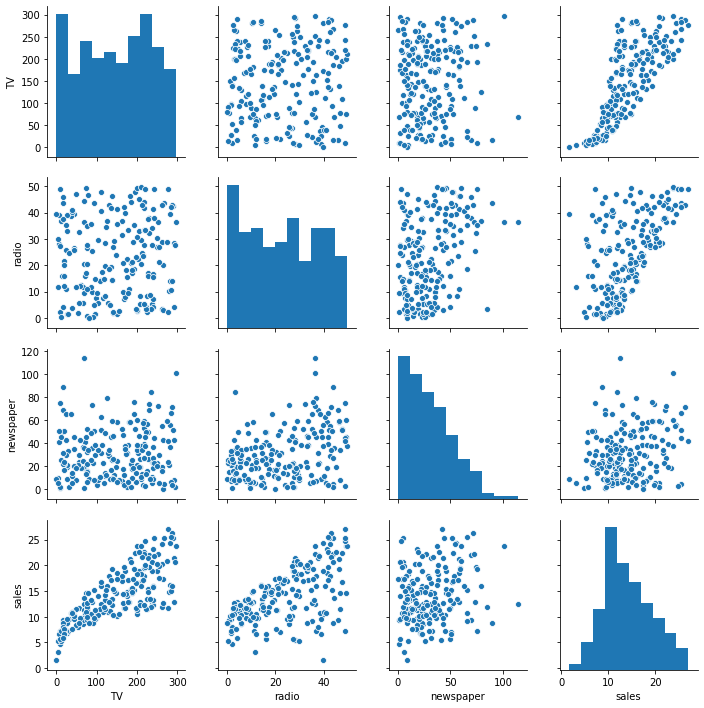

In [6]:
sns.pairplot(ads);

### Polynomial Features

In [ ]:
# Try and create your own polynomial features with degree 2 in sklearn and create a linear model
# Answer is at the bottom 

In [18]:
# # Instantiate our polynomial features object with degree of 2
# pf = PolynomialFeatures(degree=2)

# x_poly = pf.fit_transform(X_train)

# lr_poly = LinearRegression()
# lr_poly.fit(x_poly, y_train)

# x_poly_test = pf.fit_transform(X_test)
# poly_preds_test = lr_poly.predict(x_poly_test)

# rmse = (mean_squared_error(poly_preds, y_test))**.5
# rmse

### Ridge Regression

In [19]:
ss = StandardScaler()
pf = PolynomialFeatures()

X_train_processed = pf.fit_transform(ss.fit_transform(X_train))
X_test_processed = pf.transform(ss.transform(X_test))

#alpha == lambda since lamda is a key word in python
rr = Ridge(alpha=1)

rr.fit(X_train_processed, y_train)
ridge_preds = rr.predict(X_test_processed)

np.sqrt(mean_squared_error(ridge_preds, y_test))

0.9189182122023012

### Why did I pick an alpha of 1? Is there a principled way to choose this hyperparamter?

Create many models on the training set and see which one does best on unseen data

## Crossvalidation

How can we know what values of lamda to choose for ridge or lasso regression? Crossvalidation!

We have already discussed the train test split and that is the basis for all other kinds of crossvalidation. We can extend this 

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score()

TypeError: cross_val_score() missing 2 required positional arguments: 'estimator' and 'X'

## Try to find the optimal value for alpha/lamda for lasso regression

## Appendix

In [26]:
pf = PolynomialFeatures()
X_poly_train = pf.fit_transform(X_train[['TV', 'radio', 'newspaper']])

pf_sales = pd.DataFrame(X_poly_train, columns=pf.get_feature_names(['TV', 'radio', 'newspaper']))

In [27]:
pf_y = pd.concat([pf_sales[['TV', 'radio', 'newspaper', 'TV radio',
                            'TV newspaper']],
                  ads['sales']],  axis=1)

In [28]:
poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)


X_poly_test = pf.transform(X_test[['TV', 'radio', 'newspaper']])
poly_preds = poly_lr.predict(X_poly_test)

np.sqrt(mean_squared_error(poly_preds, y_test))

0.9169126776834098

In [29]:
list(zip(pf_sales.columns, poly_lr.coef_))

[('1', 0.0),
 ('TV', 0.05100581629089756),
 ('radio', 0.03935467201963928),
 ('newspaper', 0.001822838508664199),
 ('TV^2', -0.00010485041853516872),
 ('TV radio', 0.0010260285920329283),
 ('TV newspaper', -1.619633125614503e-05),
 ('radio^2', 0.00017437299545279935),
 ('radio newspaper', -8.794858220481957e-05),
 ('newspaper^2', 4.593500943813466e-05)]

/Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


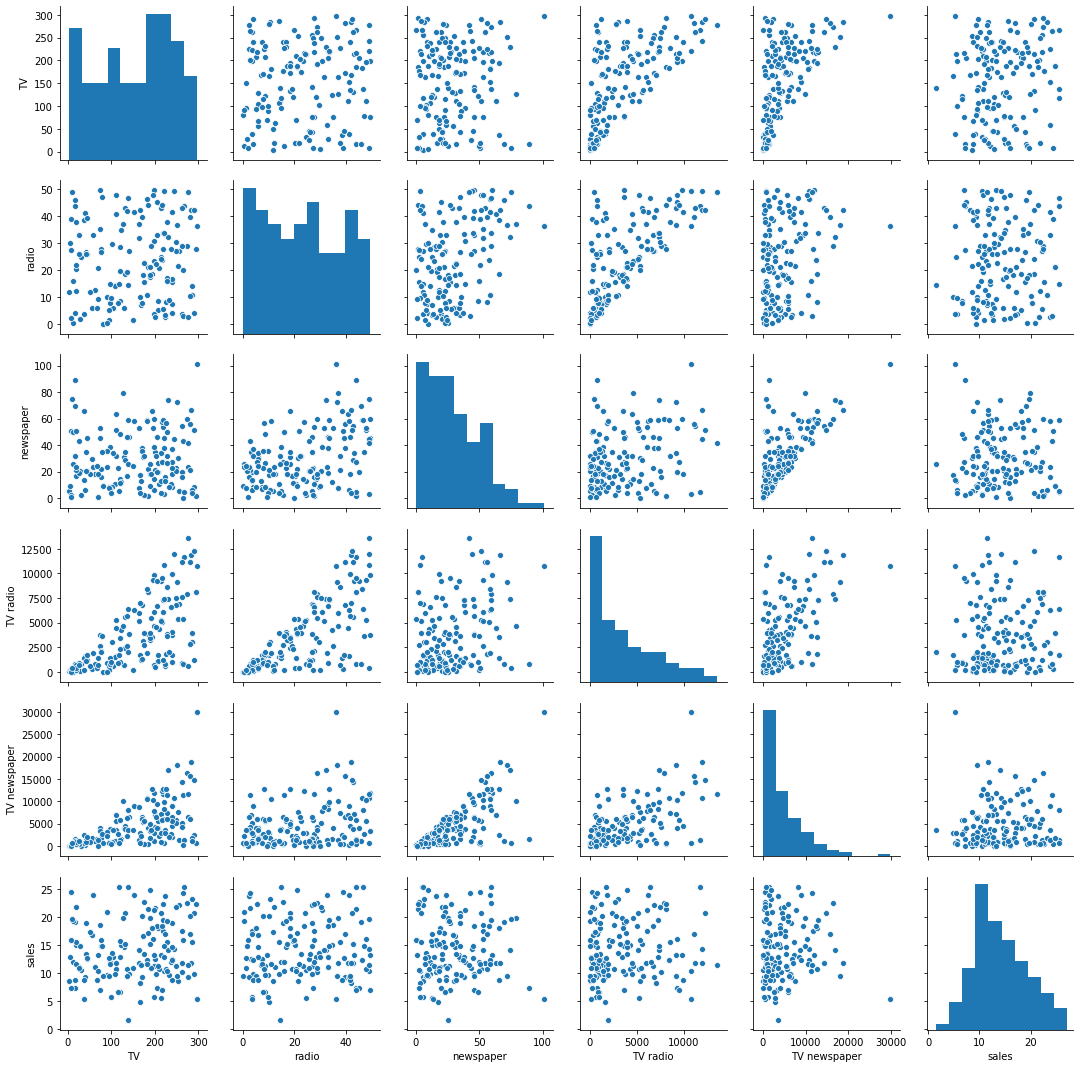

In [30]:
sns.pairplot(pf_y);